# We will pick a specific color as our target color, for example, RGB = [50, 130, 25] and watch the random pixels evolve into this color.

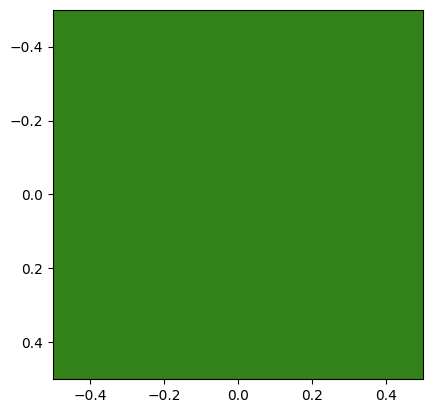

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import random

traget_color = np.array([50, 130, 25])
plt.imshow(np.reshape(traget_color, (1, 1, 3)))

In [2]:
def calc_fitness(chromosome, target_grid):
  "Claculate the finess of a chromosome by comparing it to the target grid."

  return np.mean(np.abs(chromosome - target_grid))

In [3]:
def evolve_population(population, target_grid, mutation_rate, elite_ratio):
  "Evolve population by selecting the best chromosomes(elites), breeding them, and mutating the offspring"

  # Calculate fitness values for each chromosome in the population
  fitness_values = [calc_fitness(p, target_grid) for p in population]

  # Detedmine the indices of the best chromosomes(elites)
  elite_index = np.argsort(fitness_values)[:int(len(population) * elite_ratio)]

  # Select the best chromosomes(elites) from the population
  elites = [population[i] for i in elite_index]

  # Initialize the new population
  new_population = []

  # Create new iffspring by breeding the elites
  while len(new_population) < len(population) - len(elites):
    # Select two parent chromosomes randomly from the elites
    parent1, parent2 = random.choices(elites, k=2)

    # Initialize the child chromosome
    child = np.zeros(parent1.shape)

    # Loop through the elements of the paraent chromosomes
    for i in range(len(parent1)):
      for j in range(len(parent1[i])):
        for k in range(len(parent1[i][j])):
          # Randomlt inherit the element from either parent
          if random.random() < 0.5:
            child[i][j][k] = parent1[i][j][k]
          else:
            child[i][j][k] = parent2[i][j][k]

          # MUtate the element with a certain probability
          if random.random() < mutation_rate:
            child[i][j][k] = np.random.randint(0, 256)

      # Add the child chromosome to the new population
      new_population.append(child)

    # Combine the offspring to form the evolved population
    return elites + new_population

In [4]:
images = []

def simulate(size, target_grid, generations, mutation_rate, elite_ratio):
  "Simulates the evolutionary process to generate new images"

  # Size of each image in the population
  grid_size = (16, 16, 3)

  # Initialize the population with random values
  population = [np.random.randint(0, 256, size=grid_size) for _ in range(size)]

  for i in range(generations):
    # Evolve the ppulation for each generation
    population = evolve_population(population, target_grid, mutation_rate, elite_ratio)

    # Find the chromosome with the best fitness value
    best_fit = min(population, key=lambda p: calc_fitness(p, target_grid))
    print(f'Generation {i}: Best fitness {calc_fitness(best_fit, target_grid)}')

    images.append(best_fit.astype(np.uint8))

    # Return the best fit image and the list of all images
  return min(population, key=lambda p: calc_fitness(p, target_grid)), images

In [5]:
target_grid = np.zeros((16, 16, 3), dtype=np.uint8)
target_grid[:] = [50, 130, 25]

population_size = 400
num_generations = 10000
mutation_rate = 0.01
elite_ratio = 0.15

best_camouflage, images = simulate(population_size, target_grid, num_generations, mutation_rate, elite_ratio)

Streaming output truncated to the last 5000 lines.
Generation 5000: Best fitness 33.46484375
Generation 5001: Best fitness 33.46484375
Generation 5002: Best fitness 33.46484375
Generation 5003: Best fitness 33.46484375
Generation 5004: Best fitness 33.46484375
Generation 5005: Best fitness 33.46484375
Generation 5006: Best fitness 33.46484375
Generation 5007: Best fitness 33.46484375
Generation 5008: Best fitness 33.46484375
Generation 5009: Best fitness 33.46484375
Generation 5010: Best fitness 33.46484375
Generation 5011: Best fitness 33.46484375
Generation 5012: Best fitness 33.46484375
Generation 5013: Best fitness 33.46484375
Generation 5014: Best fitness 33.46484375
Generation 5015: Best fitness 33.46484375
Generation 5016: Best fitness 33.46484375
Generation 5017: Best fitness 33.46484375
Generation 5018: Best fitness 33.46484375
Generation 5019: Best fitness 33.46484375
Generation 5020: Best fitness 33.46484375
Generation 5021: Best fitness 33.46484375
Generation 5022: Best fit

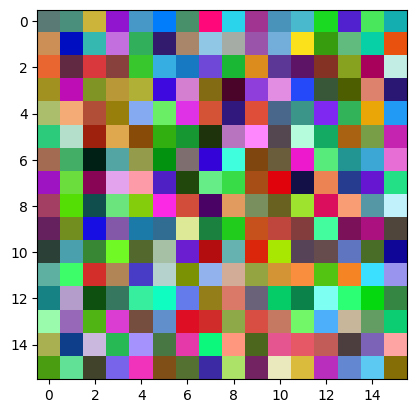

In [6]:
# First generation
plt.imshow(images[0])

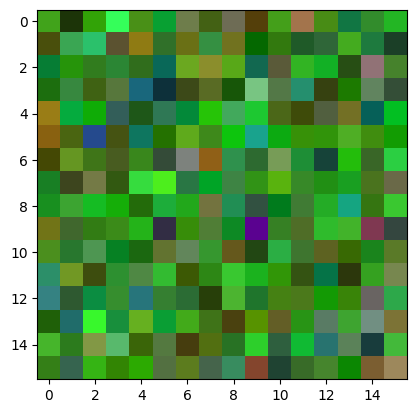

In [7]:
# Last generation
plt.imshow(images[-1])